In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

# データセットの読込み
boston = load_boston()

# データフレームの作成
# 説明変数の格納
df = pd.DataFrame(boston.data, columns = boston.feature_names)

# 目的変数の追加
df['MEDV'] = boston.target

# データの中身を確認
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# ライブラリーのインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 学習データと評価データを作成
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:13], df.iloc[:, 13], test_size=0.2, random_state=2)

#データを標準化
sc = StandardScaler()
sc.fit(x_train) #学習用データで標準化
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [ ]:
# ライブラリーのインポート
from sklearn.linear_model import LinearRegression

# スコア計算のためのライブラリ
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# モデルの学習
lr = LinearRegression()
lr.fit(x_train_std, y_train)

# 予測　
pred_lr = lr.predict(x_test_std)

# 評価
# 決定係数(R2)
r2_lr = r2_score(y_test, pred_lr)

# 平均絶対誤差(MAE)
mae_lr = mean_absolute_error(y_test, pred_lr)

print("R2　:　%.3f" % r2_lr)
print("MAE : %.3f" % mae_lr)

# 回帰係数
print("Coef = ", lr.coef_)
# 切片
print("Intercept =", lr.intercept_)

R2　:　0.779
MAE : 3.113
Coef =  [-0.93451207  0.85487686 -0.10446819  0.81541757 -1.90731862  2.54650028
  0.25941464 -2.92654009  2.80505451 -1.95699832 -2.15881929  1.09153332
 -3.91941941]
Intercept = 22.44133663366339


In [ ]:
pred_lr

array([23.01506153, 21.2115869 , 33.71590384, 31.56542369,  3.1826268 ,
        3.15381954, 27.40305304, 22.2126176 , 14.86506114, 21.34105453,
       30.95942941, 26.70065029, 21.12624382, 18.37282564, 17.64315354,
       25.38194186, 24.42970445, 13.36957057,  8.66686786, 18.57490534,
       21.73966467, 20.34270529, 36.5461105 , 20.59627495, 19.87979627,
       15.75766967, 37.11632999, 34.85897895, 30.83458635, 23.23441285,
       18.68278505, 20.749546  , 31.84560076, 30.20214207, 13.3861702 ,
       15.87078398, 13.70766096, 23.74163998, 25.95135088, 23.18325878,
       28.99906539, 12.50341936, 31.08347911,  6.39401895, 23.71801218,
       20.61523929, 33.15362417, 19.21862493, 35.89603081,  0.82365329,
       31.90288611, 31.69640543,  6.58849712, 34.62762996, 20.41162545,
       19.69277608, 19.53445865, 18.58689088, 15.81420496, 22.98764309,
       19.65947045, 16.36377019, 18.48783369, 32.76568172, 35.49022568,
       24.58349631, 41.5854766 , 32.94818456, 14.60990256, 27.43

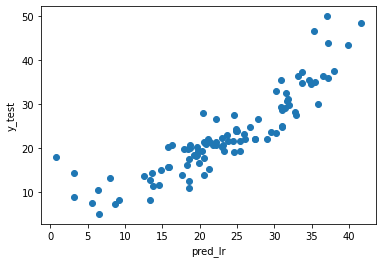

In [ ]:
# ライブラリーのインポート
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("pred_lr")
plt.ylabel("y_test")
plt.scatter(pred_lr, y_test)

plt.show()

In [ ]:
# ライブラリーのインポート
from sklearn.linear_model import Ridge

# モデルの学習
ridge = Ridge(alpha=10)
ridge.fit(x_train_std, y_train)

# 予測　
pred_ridge = ridge.predict(x_test_std)

# 評価
# 決定係数(R2)
r2_ridge = r2_score(y_test, pred_ridge)

# 平均絶対誤差(MAE)
mae_ridge = mean_absolute_error(y_test, pred_ridge)

print("R2　:　%.3f" % r2_ridge)
print("MAE : %.3f" % mae_ridge)

# 回帰係数
print("Coef = ", ridge.coef_)

R2　:　0.780
MAE : 3.093
Coef =  [-0.86329633  0.7285083  -0.27135102  0.85108307 -1.63780795  2.6270911
  0.18222203 -2.64613645  2.17038535 -1.42056563 -2.05032997  1.07266175
 -3.76668388]


In [ ]:
pred_ridge

array([22.91044323, 21.53397244, 33.19377343, 31.06746567,  3.19833094,
        3.64662565, 27.33264419, 23.08195399, 14.63749317, 21.66957917,
       30.79673326, 26.55735187, 21.41724229, 18.25384215, 17.61886847,
       25.34374455, 24.33876063, 13.3872763 ,  8.8999307 , 18.57336765,
       21.94975226, 20.52205235, 36.12025376, 20.5267392 , 19.78329343,
       16.01724622, 36.77248739, 34.81735983, 30.65497556, 23.48115344,
       18.29495225, 20.90247154, 31.74835767, 29.97070314, 13.30015301,
       16.22199615, 13.58672632, 23.90186731, 25.84866501, 23.22507831,
       28.73110723, 12.7943185 , 31.10888785,  6.38366882, 23.32005389,
       20.41410955, 33.31082934, 19.14499154, 35.3896122 ,  0.74105634,
       31.66709313, 31.44317444,  6.82219299, 34.16770243, 19.94988928,
       20.00244902, 19.60787192, 18.71879978, 16.12643697, 23.03318714,
       19.60186563, 17.0073295 , 18.61116798, 32.06529326, 34.88048293,
       24.77187058, 40.81451276, 32.75890454, 14.42647949, 27.56

In [ ]:
df_ridge = pd.DataFrame(pred_ridge)

In [ ]:
df_lr = pd.DataFrame(pred_lr)

In [ ]:
df_lr.columns = ['lr']
print(df_lr)

            lr
0    23.015062
1    21.211587
2    33.715904
3    31.565424
4     3.182627
..         ...
97   30.286647
98   21.082099
99   13.654677
100  31.386966
101  24.991749

[102 rows x 1 columns]


In [ ]:
pd.concat([df_ridge, df_lr, df_lr], axis=1, sort=False)

,0,lr,lr
0,22.910443,23.015062,23.015062
1,21.533972,21.211587,21.211587
2,33.193773,33.715904,33.715904
3,31.067466,31.565424,31.565424
4,3.198331,3.182627,3.182627
...,...,...,...
97,30.597944,30.286647,30.286647
98,21.204929,21.082099,21.082099
99,13.949212,13.654677,13.654677
100,31.231566,31.386966,31.386966


In [ ]:
df_ridge.columns = ['ridge']
print(df_ridge)

         ridge
0    22.910443
1    21.533972
2    33.193773
3    31.067466
4     3.198331
..         ...
97   30.597944
98   21.204929
99   13.949212
100  31.231566
101  24.996322

[102 rows x 1 columns]


In [ ]:
pd.DataFrame(pd.np.column_stack([df_ridge, pred_lr, dtype=int)]))

SyntaxError: ignored

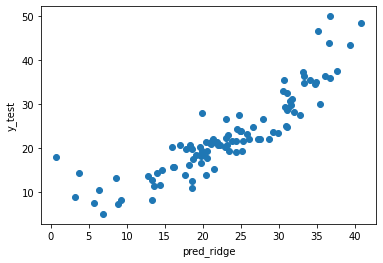

In [ ]:
plt.xlabel("pred_ridge")
plt.ylabel("y_test")
plt.scatter(pred_ridge, y_test)

plt.show()

In [ ]:
# ライブラリーのインポート
from sklearn.linear_model import Lasso

# モデルの学習
lasso = Lasso(alpha=0.05)
lasso.fit(x_train_std, y_train)

# 予測　
pred_lasso = lasso.predict(x_test_std)

# 評価
# 決定係数(R2)
r2_lasso = r2_score(y_test, pred_lasso)

# 平均絶対誤差(MAE)
mae_lasso = mean_absolute_error(y_test, pred_lasso)

print("R2　:　%.3f" % r2_lasso)
print("MAE : %.3f" % mae_lasso)

# 回帰係数
print("Coef = ", lasso.coef_)

R2　:　0.782
MAE : 3.071
Coef =  [-0.80179157  0.66308749 -0.144492    0.81447322 -1.61462819  2.63721307
  0.05772041 -2.64430158  2.11051544 -1.40028941 -2.06766744  1.04882786
 -3.85778379]


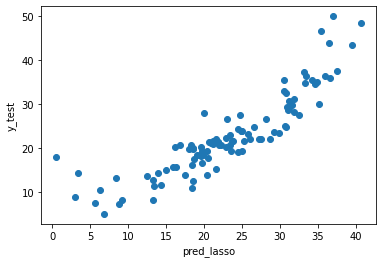

In [ ]:
plt.xlabel("pred_lasso")
plt.ylabel("y_test")
plt.scatter(pred_lasso, y_test)

plt.show()

In [ ]:
# ライブラリーのインポート
from sklearn.linear_model import ElasticNet

# モデルの学習
elasticnet = ElasticNet(alpha=0.05)
elasticnet.fit(x_train_std, y_train)

# 予測　
pred_elasticnet = elasticnet.predict(x_test_std)

# 評価
# 決定係数(R2)
r2_elasticnet = r2_score(y_test, pred_elasticnet)

# 平均絶対誤差(MAE)
mae_elasticnet = mean_absolute_error(y_test, pred_elasticnet)

print("R2　:　%.3f" % r2_elasticnet)
print("MAE : %.3f" % mae_elasticnet)

# 回帰係数
print("Coef = ", elasticnet.coef_)

R2　:　0.781
MAE : 3.080
Coef =  [-0.80547228  0.64625644 -0.27082019  0.84654972 -1.51126947  2.66279832
  0.09096052 -2.51833347  1.89798734 -1.21656705 -2.01097151  1.05199894
 -3.73854124]


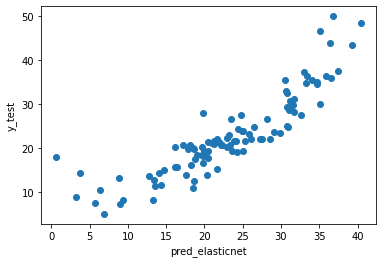

In [ ]:
plt.xlabel("pred_elasticnet")
plt.ylabel("y_test")
plt.scatter(pred_elasticnet, y_test)

plt.show()

In [ ]:
# ライブラリーのインポート
from sklearn.ensemble import RandomForestRegressor

# モデルの学習
RF = RandomForestRegressor()
RF.fit(x_train_std, y_train)

# 予測　
pred_RF = RF.predict(x_test_std)

# 評価
# 決定係数(R2)
r2_RF = r2_score(y_test, pred_RF)

# 平均絶対誤差(MAE)
mae_RF = mean_absolute_error(y_test, pred_RF)

print("R2　:　%.3f" % r2_RF)
print("MAE : %.3f" % mae_RF)

# 変数重要度
print("feature_importances = ", RF.feature_importances_)

R2　:　0.896
MAE : 2.098
feature_importances =  [0.04201874 0.00094257 0.00541873 0.00059164 0.01956035 0.39566533
 0.01504557 0.0759157  0.00558947 0.01506433 0.01921451 0.01142672
 0.39354635]


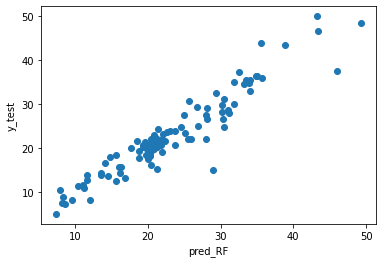

In [ ]:
plt.xlabel("pred_RF")
plt.ylabel("y_test")
plt.scatter(pred_RF, y_test)

plt.show()

In [ ]:
# ライブラリーのインポート
from sklearn.ensemble import GradientBoostingRegressor

# モデルの学習
GBDT = GradientBoostingRegressor()
GBDT.fit(x_train_std, y_train)

# 予測　
pred_GBDT = GBDT.predict(x_test_std)

# 評価
# 決定係数(R2)
r2_GBDT = r2_score(y_test, pred_GBDT)

# 平均絶対誤差(MAE)
mae_GBDT = mean_absolute_error(y_test, pred_GBDT)

print("R2 : %.3f" % r2_GBDT)
print("MAE : %.3f" % mae_GBDT)

# 変数重要度
print("feature_importances = ", GBDT.feature_importances_)

R2 : 0.905
MAE : 2.097
feature_importances =  [0.03411472 0.00042674 0.00241657 0.00070636 0.03040394 0.34353116
 0.00627447 0.10042527 0.0014266  0.0165308  0.03114765 0.01129208
 0.42130366]


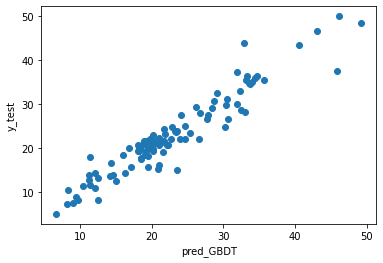

In [ ]:
plt.xlabel("pred_GBDT")
plt.ylabel("y_test")
plt.scatter(pred_GBDT, y_test)

plt.show()

In [ ]:
# ライブラリーのインポート
from sklearn.svm import SVR

# モデルの学習
SVR = SVR(kernel='linear', C=1, epsilon=0.1, gamma='auto')
SVR.fit(x_train_std, y_train)

# 予測　
pred_SVR = SVR.predict(x_test_std)

# 評価
# 決定係数(R2)
r2_SVR = r2_score(y_test, pred_SVR)

# 平均絶対誤差(MAE)
mae_SVR = mean_absolute_error(y_test, pred_SVR)

print("R2 : %.3f" % r2_SVR)
print("MAE : %.3f" % mae_SVR)

# 回帰係数
print("Coef = ", SVR.coef_)

NameError: ignored

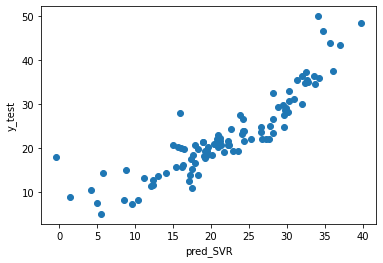

In [ ]:
plt.xlabel("pred_SVR")
plt.ylabel("y_test")
plt.scatter(pred_SVR, y_test)

plt.show()

In [ ]:
# 必要なライブラリーのインポート
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# データセットの読込み
boston = load_boston()

# データフレームの作成
df = pd.DataFrame(boston.data, columns = boston.feature_names)
# 目的変数の追加
df['MEDV'] = boston.target

# 学習データと評価データを作成
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:13], df.iloc[:, 13],
                                                    test_size=0.2, random_state=1)

#データを標準化
sc = StandardScaler()
sc.fit(x_train) #学習用データで標準化
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [ ]:
# スコア計算のためのライブラリ
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

def preprocess_sc(df):
    """データを学習データと評価データに分割し、標準化を行う

    Parameters
    ----------
    df : pd.DataFrame
        データセット（説明変数＋目的変数）

    Returns
    -------
    x_train_std : pd.DataFrame
        標準化後の学習データ（説明変数）
    y_train : pd.DataFrame
        学習データ（目的変数）
    x_test_std : pd.DataFrame
        標準化後の評価データ（説明変数）
    y_test : pd.DataFrame
        評価データ（目的変数）
    """
    x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:13], df.iloc[:, 13],
                                                        test_size=0.2, random_state=1)

    #データを標準化
    sc = StandardScaler()
    sc.fit(x_train) #学習用データで標準化
    x_train_std = sc.transform(x_train)
    x_test_std = sc.transform(x_test)

    return x_train_std, x_test_std, y_train, y_test

def Linear_Regression(x_train_std, y_train, x_test_std):  
    """線形回帰で予測する

    Parameters
    ----------
    x_train_std : pd.DataFrame
        標準化後の学習データ（説明変数）
    y_train : pd.DataFrame
        学習データ（目的変数）
    x_test_std : pd.DataFrame
        標準化後の評価データ（説明変数）

    Returns
    -------
    pred_lr : pd.DataFrame
        線形回帰の予測結果
    """
    lr = LinearRegression()
    lr.fit(x_train_std, y_train)

    pred_lr = lr.predict(x_test_std)

    return pred_lr

def Ridge_Regression(x_train_std, y_train, x_test_std, ALPHA=10.0):  
    """Ridge回帰で予測する

    Parameters
    ----------
    x_train_std : pd.DataFrame
        標準化後の学習データ（説明変数）
    y_train : pd.DataFrame
        学習データ（目的変数）
    x_test_std : pd.DataFrame
        標準化後の評価データ（説明変数）
    ALPHA : float
        正則化パラメータα

    Returns
    -------
    pred_ridge : pd.DataFrame
        Ridge回帰の予測結果
    """
    ridge = Ridge(alpha=ALPHA)
    ridge.fit(x_train_std, y_train)

    pred_ridge = ridge.predict(x_test_std)

    return pred_ridge

def Lasso_Regression(x_train_std, y_train, x_test_std, ALPHA=0.05):  
    """Lasso回帰で予測する

    Parameters
    ----------
    x_train_std : pd.DataFrame
        標準化後の学習データ（説明変数）
    y_train : pd.DataFrame
        学習データ（目的変数）
    x_test_std : pd.DataFrame
        標準化後の評価データ（説明変数）
    ALPHA : float
        正則化パラメータα

    Returns
    -------
    pred_lasso : pd.DataFrame
        Lasso回帰の予測結果
    """
    lasso = Lasso(alpha=ALPHA)
    lasso.fit(x_train_std, y_train)

    pred_lasso = lasso.predict(x_test_std)

    return pred_lasso

def ElasticNet_Regression(x_train_std, y_train, x_test_std, ALPHA=0.05):  
    """ElasticNet回帰で予測する

    Parameters
    ----------
    x_train_std : pd.DataFrame
        標準化後の学習データ（説明変数）
    y_train : pd.DataFrame
        学習データ（目的変数）
    x_test_std : pd.DataFrame
        標準化後の評価データ（説明変数）
    ALPHA : float
        正則化パラメータα

    Returns
    -------
    pred_elasticnet : pd.DataFrame
        ElasticNet回帰の予測結果
    """
    elasticnet = ElasticNet(alpha=ALPHA)
    elasticnet.fit(x_train_std, y_train)

    pred_elasticnet = elasticnet.predict(x_test_std)

    return pred_elasticnet

def RandomForest_Regressor(x_train_std, y_train, x_test_std):  
    """RandomForest回帰で予測する

    Parameters
    ----------
    x_train_std : pd.DataFrame
        標準化後の学習データ（説明変数）
    y_train : pd.DataFrame
        学習データ（目的変数）
    x_test_std : pd.DataFrame
        標準化後の評価データ（説明変数）

    Returns
    -------
    pred_RF : pd.DataFrame
        RandomForest回帰の予測結果
    """
    RF = RandomForestRegressor()
    RF.fit(x_train_std, y_train)

    pred_RF = RF.predict(x_test_std)

    return pred_RF

def GradientBoosting_Regressor(x_train_std, y_train, x_test_std):  
    """GBDTで予測する

    Parameters
    ----------
    x_train_std : pd.DataFrame
        標準化後の学習データ（説明変数）
    y_train : pd.DataFrame
        学習データ（目的変数）
    x_test_std : pd.DataFrame
        標準化後の評価データ（説明変数）

    Returns
    -------
    pred_GBDT : pd.DataFrame
        GBDTの予測結果
    """
    GBDT = GradientBoostingRegressor()
    GBDT.fit(x_train_std, y_train)

    pred_GBDT = GBDT.predict(x_test_std)

    return pred_GBDT

def SVR_Regression(x_train_std, y_train, x_test_std):  
    """SVRで予測する

    Parameters
    ----------
    x_train_std : pd.DataFrame
        標準化後の学習データ（説明変数）
    y_train : pd.DataFrame
        学習データ（目的変数）
    x_test_std : pd.DataFrame
        標準化後の評価データ（説明変数）

    Returns
    -------
    pred_SVR : pd.DataFrame
        GBDTの予測結果
    """
    svr = SVR()
    svr.fit(x_train_std, y_train)

    pred_SVR = svr.predict(x_test_std)

    return pred_SVR

def main():
    # データセットの読込み
    boston = load_boston()

    # データフレームの作成
    # 説明変数の格納
    df = pd.DataFrame(boston.data, columns = boston.feature_names)

    # 目的変数の追加
    df['MEDV'] = boston.target

    # データの前処理
    x_train_std, x_test_std, y_train, y_test = preprocess_sc(df)

    pred_lr = pd.DataFrame(Linear_Regression(x_train_std, y_train, x_test_std))
    pred_ridge = pd.DataFrame(Ridge_Regression(x_train_std, y_train, x_test_std, ALPHA=10.0))
    pred_lasso = pd.DataFrame(Lasso_Regression(x_train_std, y_train, x_test_std, ALPHA=0.05))
    pred_elasticnet = pd.DataFrame(ElasticNet_Regression(x_train_std, y_train, x_test_std, ALPHA=0.05))
    pred_RF = pd.DataFrame(RandomForest_Regressor(x_train_std, y_train, x_test_std))
    pred_GBDT = pd.DataFrame(GradientBoosting_Regressor(x_train_std, y_train, x_test_std))
    pred_SVR = pd.DataFrame(SVR_Regression(x_train_std, y_train, x_test_std))
    pred_all = pd.concat([df_lr, pred_ridge, pred_lasso, pred_elasticnet, pred_RF, pred_GBDT, pred_SVR], axis=1, sort=False)
    pred_all.columns = ["df_lr", "pred_ridge", "pred_lasso", "pred_elasticnet", "pred_RF", "pred_GBDT", "pred_SVR"]

    return pred_all

if __name__ == "__main__":
    pred_all = main()

In [ ]:
pred_all

,df_lr,pred_ridge,pred_lasso,pred_elasticnet,pred_RF,pred_GBDT,pred_SVR
0,23.015062,31.843366,31.675627,31.447213,29.855,31.099364,29.201744
1,21.211587,28.191901,28.141179,28.186233,26.973,26.798775,27.968797
2,33.715904,18.174639,17.992214,18.188757,19.633,18.785927,17.856691
3,31.565424,21.837708,21.950251,22.014147,20.371,20.578452,20.945317
4,3.182627,18.571254,18.594703,18.487284,19.485,20.100782,18.882625
...,...,...,...,...,...,...,...
97,30.286647,28.392201,28.508057,28.192451,23.548,24.344395,25.391124
98,21.082099,36.839996,36.841312,36.715960,41.953,46.299745,33.778381
99,13.654677,20.832199,20.861783,20.924816,20.717,21.127397,20.672675
100,31.386966,16.993248,17.258409,16.954629,16.362,14.194582,15.213732
